# Analysis of Crime in Each Maryland County Based on Education Spending Per Student, Median Household Income, and Unemployment Rate

Diego Ferreira, Lillian Mueller, Ananya Uniyal

May 16th, 2022

Introduction/overview of the tutorial

Crime rates vary vastly between different regions. Certain areas are commonly known to be more dangerous and have higher rates of crime than other areas. This tutorial aims to analyze these regional differences in crime by looking at crime rates in each county in maryland. Furthermore, this tutorial aims to classify the factors that contribute to this variation in crime from county to county. We chose to look at factors that determine the wealth of a county and see if this can predict crime rate. Household median income is a major predictor of wealth in a county and was one of the main factors we used. Another factor we used was education spending per student. We predicted that this factor could also determine the wealth of a county and how much money they had to spend on education and whether that influenced crime rate. The last factor we looked at was the unemployment rate.

This project also aims to determine which factor is the best predictor of crime and whether combining multiple factors in the data analysis leads to better predictions of crime rate. We hope these predictions can be used to motivate government policies such as increasing amount of education spending per county, providing benefits/support to decrease unemployment rate, etc. The data is analyzed from the years 2017-2019 (this is due to limited availability in government datasets for recent years). 

The first step of this tutorial is to extract data from various government databases and websites. The next step is to clean this data and reformat it. Then the data is plotted to determine any trends. Next, a linear regression learning algorithm is applied to see whether crime rate can be predicted on any one factor or a combination of factors. Lastly, the insights of analysis of crime in Maryland counties is discussed with respect to the three factors mentioned. 

We used various python packages in our code to assist with data analysis and machine learning. 

Description of the packages used:

- Pandas was used to modify data frames and tabular data. 
- Numpy was used to work with numerical data. 
- Matplotlib was used to plot various graphs and perform exploratory analysis. 
- Seaborn was another package used for statistical data visualization. 
- Sklearn was a package used for predictive data analysis and machine learning. With this package the data was trained to create a model and then test data was used to determine how accurate the model was. 
- Statsmodels was used to estimate various statistical models. 
- Sklearn metrics was used to determine the accuracy of our machine learning algorithm. 

In [20]:
# All packages used in the tutorial
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Step 1: Data Collection/Curation and Parsing

Step one focuses on collecting data from various sites. Here we will be reading in csv files from different databases as well as scraping some websites for data. 

The first step here is to download the csv from the Maryland's Open Data Portal (https://opendata.maryland.gov/Public-Safety/Violent-Crime-Property-Crime-by-County-1975-to-Pre/jwfa-fdxs). This dataset contains the violent and property crimes committed in Maryland by county in the years 1975 to Present (unfortunately the data is only available up to 2019). Crime is divided into different categories:

1. Murder
2. Rape
3. Robbery
4. Aggravated Assault
5. Breaking and Entering
6. Larceny Theft
7. Motor Vehicle theft

The population of each county is also given for each year. We will be looking at crime rates per capita to generalize crime rates over all counties. 

Access the crime data for each county by going to the State of Maryland Open Data Portal here (https://opendata.maryland.gov/Public-Safety/Violent-Crime-Property-Crime-by-County-1975-to-Pre/jwfa-fdxs). Click on "Export" on the upper right corner and download the data as a CSV. Use the pandas read_csv function (more information here: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to read in the data as a dataframe. 

In [21]:
# CRIME DATA

# read csv file uploaded on github
crime_data = pd.read_csv("https://raw.githubusercontent.com/lgmueller/lgmueller.github.io/main/Violent_Crime___Property_Crime_by_County__1975_to_Present%20(2).csv")

# contains raw data
crime_data.head()

,JURISDICTION,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,M/V THEFT,...,"B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE","MURDER RATE PERCENT CHANGE PER 100,000 PEOPLE","RAPE RATE PERCENT CHANGE PER 100,000 PEOPLE","ROBBERY RATE PERCENT CHANGE PER 100,000 PEOPLE","AGG. ASSAULT RATE PERCENT CHANGE PER 100,000 PEOPLE","B & E RATE PERCENT CHANGE PER 100,000 PEOPLE","LARCENY THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE","M/V THEFT RATE PERCENT CHANGE PER 100,000 PEOPLE"
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,839.9,1789.0,116.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,692.3,1649.1,87.0,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,721.1,1693.0,124.2,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,674.0,1738.2,125.1,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,629.7,2020.8,124.2,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7


This crime dataset contains crime data from 1975-2019 for each maryland county. This crime data is separated into various categories including Murder, Rape, Robbery, Aggrevated Assult, Breaking and Entering, Larceny Theft, and Motorvechile theft. The crime rate per 100,000 people is also given. 

Next get the median household income data. To access the data go to the State of Maryland Open Data Portal here (https://opendata.maryland.gov/Demographic/Maryland-Median-Household-Income-By-Year-With-Marg/bvk4-qsxs) and click "Export" on the upper right corner to download the data as a CSV. Use the pandas read_csv function (more information here: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) to read in the data as a dataframe. 

In [22]:
# MEDIAN HOUSEHOLD INCOME DATA

# Read CSV for median household income 
income_data = pd.read_csv("https://raw.githubusercontent.com/lgmueller/lgmueller.github.io/main/Maryland_Median_Household_Income_By_Year_With_Margin_Of_Error__2010-2019%20(1).csv")

# Raw data from Open Data Portal
income_data.head()

,Date created,Year,Data,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
0,"September 29, 2020",2010,Income,68933,37083,80908,38186,62300,86536,55480,...,49017,88559,69524,78503,38134,81559,56806,51610,47702,55492
1,"September 29, 2020",2010,MOE,833,2826,2311,1414,2006,5064,2965,...,4582,2710,1609,5181,2747,5070,3948,3327,3097,3507
2,"September 29, 2020",2011,Income,70075,38504,82980,38478,62309,88406,50809,...,49795,92288,70114,75158,35426,80943,55145,52028,45788,48472
3,"September 29, 2020",2011,MOE,760,2693,3430,1536,1728,4369,4213,...,4603,2758,1911,6363,3426,2717,4929,2928,3582,4653
4,"September 29, 2020",2012,Income,71169,38670,87083,39077,62413,87215,48772,...,49969,94365,69258,79012,34454,85478,61529,52604,50204,55875


This dataset contains the median household income for each county for the years 2010-2019. Each year and county also has Margin of Error data. These rows are not necessary and will be removed in the next step. 

Next upload the data for education spending per student for each county in Maryland. This data can be found at the following links (scroll down to the bottom of the page to find the Local Funding for Public Schools): 

2018 - https://conduitstreet.mdcounties.org/2018/02/21/chart-compares-school-funding-per-student-county-by-county/
2019 - https://conduitstreet.mdcounties.org/2019/02/20/funding-per-pupil-charts-for-2019/

Data on funding per student was very difficult to find. After extensive searching we were only able to find data for the years 2018 and 2019. 

In [23]:
# LOCAL EDUCATION FUNDING PER PUPIL

# Read CSV for median household income 
funding_data = pd.read_csv("https://raw.githubusercontent.com/lgmueller/lgmueller.github.io/main/Local%20Funding%20for%20Public%20Schools%20Per%20Pupil.csv")
funding_data.head()

,County,Year,Local Funding Per Pupil
0,Worcester County,2018,13256
1,Montgomery County,2018,10599
2,Howard County,2018,10321
3,Kent County,2018,9236
4,Talbot County,2018,8621


This dataset shows the local funding per pupil/student for each county in Maryland (for the years 2018 and 2019).

Next, we will get the unemployment information for each county in maryland for the years 2017-2019. This website (https://msa.maryland.gov/msa/mdmanual/01glance/economy/html/unemployrates.html#:~:text=In%20March%202022%2C%20Maryland%27s%20unemployment,civilian%20population%20number%2C%20was%2065.6) contains unemployment percentages in tables for each county in Maryland. 

We use the pandas read_html function (more information here: https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) to read in the HTML code on the webpage. Read_html will allow us to read in tables from the webpage and easily put the unemployment data into a dataframe.

In [24]:
# UNEMPLOYMENT RATES 

tables = pd.read_html('https://msa.maryland.gov/msa/mdmanual/01glance/economy/html/unemployrates.html#:~:text=In%20March%202022%2C%20Maryland%27s%20unemployment,civilian%20population%20number%2C%20was%2065.6') 
# Returns list of all tables on page

# Step 2: Data Management and Representation

The next step will be to format the data into a more convenient form for data analysis. This part of the data science pipline involves cleaning up the data, getting rid of unnecessary information included in the raw dataframe, and trasnforming the data to contain the values we need for analysis.  

The first part of this step is to clean up the violent crime data. We need to ensure that this data is readable and compatible with the other three data sets (spending per student, median household income, and unemployment rates) since we need to be able to compare them for our data analysis. 

First we only extract years 2017, 2018, and 2019 from the dataset since these are our years of interest. Next we remove all the unnecessary columns from the dataset ('PERCENT CHANGE', 'VIOLENT CRIME TOTAL', 'VIOLENT CRIME PERCENT', 'VIOLENT CRIME PERCENT CHANGE', 'PROPERTY CRIME TOTALS', 'PROPERTY CRIME PERCENT', 'PROPERTY CRIME PERCENT CHANGE', 'POPULATION', 'MURDER', 'RAPE', 'ROBBERY', 'AGG. ASSAULT', 'B & E', 'LARCENY THEFT', 'M/V THEFT', and 'GRAND TOTAL'). The remaining columns we have in this dataset are: 

- JURISDICTION (county names) 
- YEAR 
- OVERALL CRIME RATE PER 100,000 PEOPLE

In [25]:
# Cleaning up violent crime data

# only looking at years 2017, 2018, 2019
years = [2017, 2018, 2019]
# create separate dataframes for crime in 2017, 2018, and 2019
crime_17 = crime_data[crime_data.YEAR.eq(2017)]
crime_18 = crime_data[crime_data.YEAR.eq(2018)]
crime_19 = crime_data[crime_data.YEAR.eq(2019)]

# merge all three dataframes
crime_df = pd.concat([crime_17, crime_18, crime_19])

# only keep first 19 columns of the dataframe since this is the only relevant information needed
crime_df = crime_df.iloc[:, :19]

# remove the percent change and individual crime total columns since this data is not needed for our analysis
crime_df = crime_df.drop(columns = ['PERCENT CHANGE', 'VIOLENT CRIME TOTAL', 'VIOLENT CRIME PERCENT', 'VIOLENT CRIME PERCENT CHANGE', 'PROPERTY CRIME TOTALS', 'PROPERTY CRIME PERCENT', 'PROPERTY CRIME PERCENT CHANGE'])

# reset dataframe index so it starts at 0
crime_df = crime_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

# drop unecesary columns 
crime_df = crime_df.drop(columns=['POPULATION', 'MURDER', 'RAPE', 'ROBBERY', 'AGG. ASSAULT', 'B & E', 
                                  'LARCENY THEFT', 'M/V THEFT', 'GRAND TOTAL'])
crime_df.head()

,index,JURISDICTION,YEAR,"OVERALL CRIME RATE PER 100,000 PEOPLE"
0,40,Allegany County,2017,3467.1
1,87,Anne Arundel County,2017,2450.1
2,132,Baltimore City,2017,7033.7
3,177,Baltimore County,2017,3402.1
4,222,Calvert County,2017,1155.2


Next we clean up the median household income raw dataframe. We do this by removing the margin on error rows. This information is not necessary and should be cleaned out of the dataset. Furthermore, in order to be consistent with the crime dataframe which has county names as rows rather than columns we transpose the dataframe (more information here: https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.T.html). Now the median household income dataframe also contains county names in the rows rather than the columns. The followig columns are in the income_df (median household income dataframe): 

- County 
- Year
- Income

In [26]:
# MEDIAN HOUSEHOLD INCOME DATA CLEANUP

# remove all margin of error rows 
income_df = income_data[income_data['Data'] == 'Income']
income_df

# remove "Data" "MARYLAND", AND "Date Created" columns

income_df = income_df.drop(columns = ['Date created', 'Data', 'MARYLAND'])


# only keep rows for years 2017, 2018, and 2019
income_17 = income_df[income_df['Year'] == 2017]
income_18 = income_df[income_df['Year'] == 2018]
income_19 = income_df[income_df['Year'] == 2019]

# transpose data frame so county names are rows (similar to violent crime data frame) 
income_17 = income_17.T
# delete year column
income_17 = income_17.iloc[1:, :]
# rename column to income
income_17.rename(columns = {14:'Income'}, inplace = True)
# add year column 
income_17 = income_17.assign(Year='2017')[['Year'] + income_17.columns.tolist()]

# transpose data frame so county names are rows (similar to violent crime data frame) 
income_18 = income_18.T
# delete year column
income_18 = income_18.iloc[1:, :]
# rename column to income
income_18.rename(columns = {16:'Income'}, inplace = True)
# add year column 
income_18 = income_18.assign(Year='2018')[['Year'] + income_18.columns.tolist()]

# transpose data frame so county names are rows (similar to violent crime data frame) 
income_19 = income_19.T
# delete year column
income_19 = income_19.iloc[1:, :]
# rename column to income
income_19.rename(columns = {18:'Income'}, inplace = True)
# add year column 
income_19 = income_19.assign(Year='2019')[['Year'] + income_19.columns.tolist()]

# merge all three dataframes
income_df = pd.concat([income_17, income_18, income_19])
income_df.reset_index(inplace=True)
income_df.rename(columns = {'index':'County'}, inplace = True)

income_df.head()

,County,Year,Income
0,Allegany County,2017,42564
1,Anne Arundel County,2017,96133
2,Baltimore City,2017,46762
3,Baltimore County,2017,73309
4,Calvert County,2017,100000


Next, we clean up the funding per student dataframe. Here we just need to sort the funding values by year and county so they are in the correct order and match the rest of the dataframes we will be comparing this to. The columns in the funding data frame are: 

- County
- Year
- Local Funding Per Pupil


In [27]:
# FUNDING DATA CLEANUP

# sort data by county and year
funding_data = funding_data.sort_values(by=['Year', 'County'])
# reset index so it starts at 0
funding_data.reset_index(inplace=True)
funding_df = funding_data
# drop index column 
funding_df = funding_df.drop(columns = ['index'])


The last dataframe we need to clean up is the unemployment rate data for each county. We read in the table from the html code from the Maryland Government Website (https://msa.maryland.gov/msa/mdmanual/01glance/economy/html/unemployrates.html#:~:text=In%20March%202022%2C%20Maryland%27s%20unemployment,civilian%20population%20number%2C%20was%2065.6). Then we create a dataframe with county, year, and unemployment rate columns and input the data from the table on the website into our dataframe. This is done by iterating through all the rows in the table and placing the corresponding information in the dataframe we created. We create a dataframe for each year and then merge the data so it is consistent with the other dataframes. The columns in this dataframe are: 

- County
- Year
- UnemploymentRate

In [28]:
# UNEMPLOYMENT RATE DATA CLEANUP 

tables = pd.read_html('https://msa.maryland.gov/msa/mdmanual/01glance/economy/html/unemployrates.html#:~:text=In%20March%202022%2C%20Maryland%27s%20unemployment,civilian%20population%20number%2C%20was%2065.6') 
table1 = tables[1]

#table1 = table1.transpose()
table1.drop(index = 0, inplace = True)

unemploy_17 = pd.DataFrame(columns = ["County", "Year", "UnemploymentRate"])
unemploy_18 = pd.DataFrame(columns = ["County", "Year", "UnemploymentRate"])
unemploy_19 = pd.DataFrame(columns = ["County", "Year", "UnemploymentRate"])

for row, val in table1.iterrows():
    unemploy_17.loc[row, "County"] = val[0]
    unemploy_17.Year = 2017
    unemploy_17.loc[row, "UnemploymentRate"] = float(val[3].rstrip(val[3][-1]))
unemploy_17.drop(index= 1, inplace = True)
unemploy_17.reset_index(inplace = True)
unemploy_17.drop(columns = ["index"], inplace = True)


for row, val in table1.iterrows():
    unemploy_18.loc[row, "County"] = val[0]
    unemploy_18.Year = 2018
    unemploy_18.loc[row, "UnemploymentRate"] = float(val[4].rstrip(val[4][-1]))
unemploy_18.drop(index= 1, inplace = True)
unemploy_18.reset_index(inplace = True)
unemploy_18.drop(columns = ["index"], inplace = True)

for row, val in table1.iterrows():
    unemploy_19.loc[row, "County"] = val[0]
    unemploy_19.Year = 2019
    unemploy_19.loc[row, "UnemploymentRate"] = float(val[5].rstrip(val[5][-1]))
unemploy_19.drop(index= 1, inplace = True)
unemploy_19.reset_index(inplace = True)
unemploy_19.drop(columns = ["index"], inplace = True)

# merge all three dataframes
unemploy_df = pd.concat([unemploy_17, unemploy_18, unemploy_19])

# drop rows with overall Maryland 
unemploy_df = unemploy_df.loc[unemploy_df['County'] != "Maryland"]

# change types of data 
unemploy_df['UnemploymentRate'] = unemploy_df['UnemploymentRate'].astype('float64')
#unemploy_df = unemploy_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

unemploy_df.head(72)

,County,Year,UnemploymentRate
1,Allegany County,2017,5.7
2,Anne Arundel County,2017,3.5
3,Baltimore City,2017,6.1
4,Baltimore County,2017,4.3
5,Calvert County,2017,3.6
...,...,...,...
20,Somerset County,2019,6.0
21,Talbot County,2019,3.4
22,Washington County,2019,3.8
23,Wicomico County,2019,4.6


# Part 3: Exploratory Data Analysis

For the Exploratory Data Analysis section we will plot all the data to see if can visualize any trends. We will plot crime trends and median household income over the years (2017-2019) for each county. Furthermore, we will look at how crime rate relates to each factor (crime rate vs funding, crime rate vs. income, crime rate vs. employment). These graphs will provide us insight on how various factors affect crime rate and allow us to determine if there is a correlation or not. 

The first graph we plot is overall crime rate over the years (2017-2019). We use matlabplotlib to plot these graphs (more info here: https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.plot.html). To plot this graph, get the crime rate from 2017-2019 for each county. The plot this trend overtime. Each county in the graph will be a different color. 

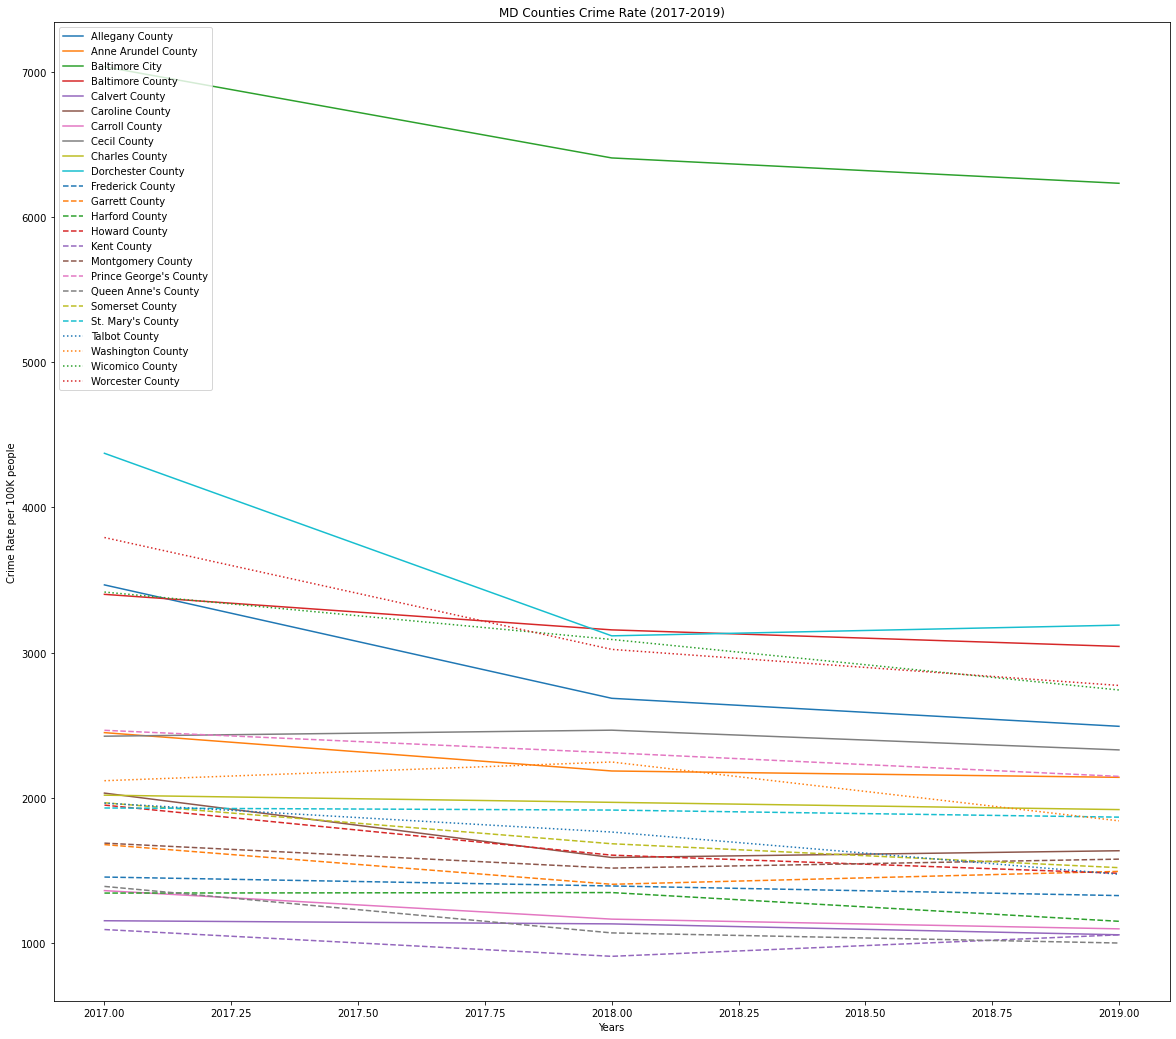

In [29]:
# Plot years vs overall crime rate
years = [2017, 2018, 2019]
county_names = crime_df.JURISDICTION.unique()
county_names_first_10 = county_names[0 : 10]
county_names_middle_10 = county_names[10 : 20]
repeat_county = ['Talbot County', 'Washington County', 'Wicomico County', 'Worcester County']

plt.figure(figsize=(20,18))
for curr_county in county_names_first_10:
    # dataframe for current county data
    curr_county_crime = crime_df[crime_df['JURISDICTION'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_crime['YEAR'].to_numpy()
    curr_crime = curr_county_crime['OVERALL CRIME RATE PER 100,000 PEOPLE'].to_numpy()
    plt.title('MD Counties Crime Rate (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Crime Rate per 100K people')
    plt.plot(curr_years, curr_crime, label = curr_county)
    
for curr_county in county_names_middle_10:
    # dataframe for current county data
    curr_county_crime = crime_df[crime_df['JURISDICTION'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_crime['YEAR'].to_numpy()
    curr_crime = curr_county_crime['OVERALL CRIME RATE PER 100,000 PEOPLE'].to_numpy()
    plt.title('MD Counties Crime Rate (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Crime Rate per 100K people')
    plt.plot(curr_years, curr_crime, linestyle='dashed')
    
    
for curr_county in repeat_county:
    # dataframe for current county data
    curr_county_crime = crime_df[crime_df['JURISDICTION'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_crime['YEAR'].to_numpy()
    curr_crime = curr_county_crime['OVERALL CRIME RATE PER 100,000 PEOPLE'].to_numpy()
    plt.title('MD Counties Crime Rate (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Crime Rate per 100K people')
    plt.plot(curr_years, curr_crime, linestyle='dotted')
    
plt.legend(county_names, loc = "upper left")
plt.show()

There appears to be a slight downward trend in crime rates for some of the counties (such as Baltimore County and Carroll County). Baltimore County and Dorchester County have signifcant downward trends in their crime rates from 2017 to 2018. Otherwise, crime remains pretty constant over the years for most counties. The counties with the highest crime rates are Baltimroe City, Dorchester County, and Baltimore County. The counties with the lowest crime rates are Kent County, Queen Anne's County, and Calvert County.

The next graph plots median household income over the years. 

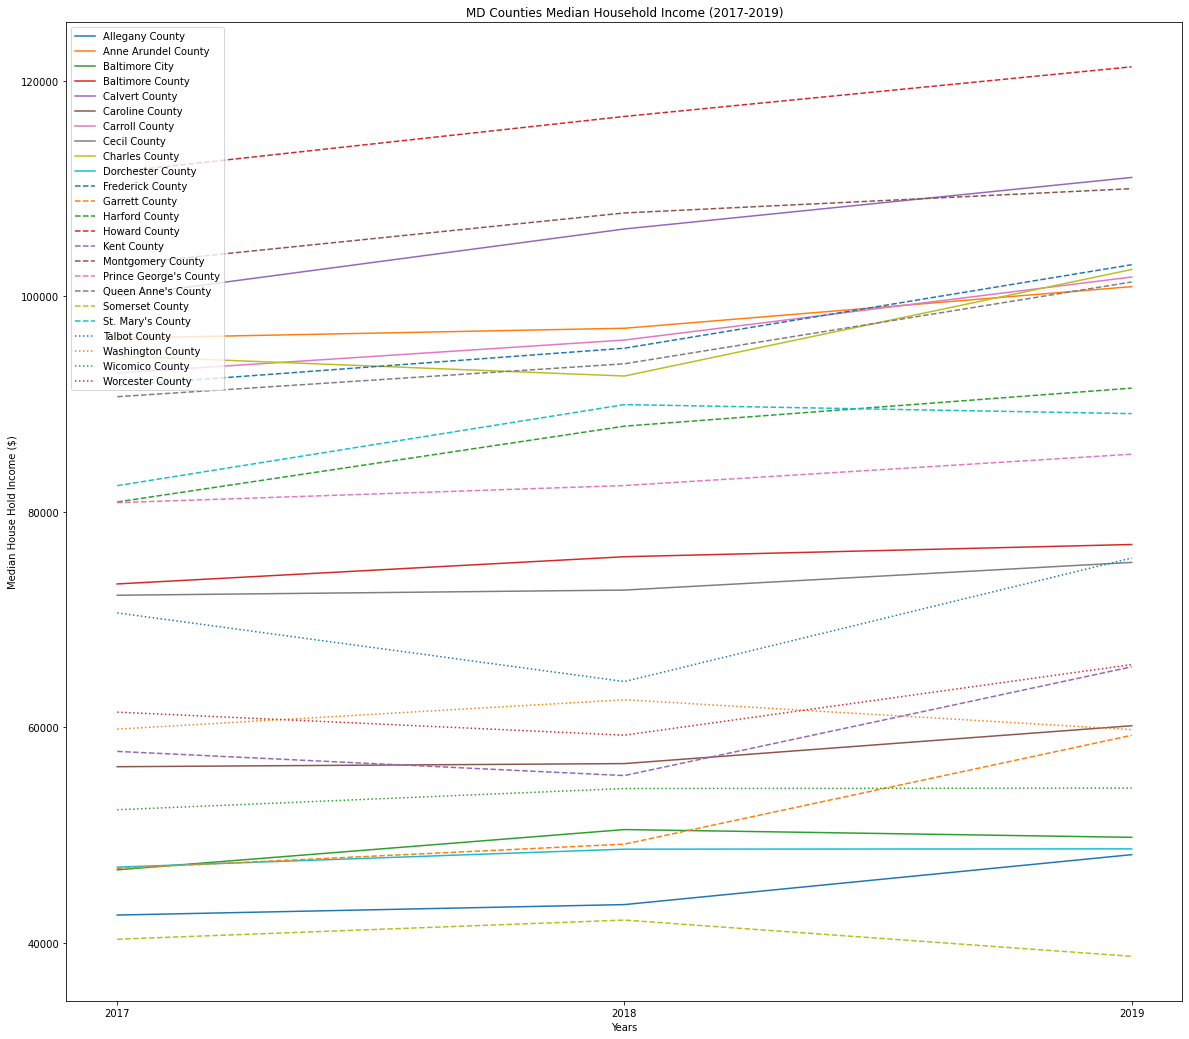

In [30]:
# Plot years vs median household income

years = [2017, 2018, 2019]
county_names = income_df.County.unique()
county_names_first_10 = county_names[0 : 10]
county_names_middle_10 = county_names[10 : 20]
repeat_county = ['Talbot County', 'Washington County', 'Wicomico County', 'Worcester County']


plt.figure(figsize=(20,18))
for curr_county in county_names_first_10:
    # dataframe for current county data
    curr_county_income = income_df[income_df['County'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_income['Year'].to_numpy()
    curr_income = curr_county_income['Income'].to_numpy()
    plt.title('MD Counties Median Household Income (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Median House Hold Income ($)')
    plt.plot(curr_years, curr_income, label = curr_county)
    
for curr_county in county_names_middle_10:
    # dataframe for current county data
    curr_county_income = income_df[income_df['County'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_income['Year'].to_numpy()
    curr_income = curr_county_income['Income'].to_numpy()
    plt.title('MD Counties Median Household Income (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Median House Hold Income ($)')
    plt.plot(curr_years, curr_income, linestyle='dashed')
    
for curr_county in repeat_county:
    # dataframe for current county data
    curr_county_income = income_df[income_df['County'] == curr_county]
    
    # turn data from dataframe into array to plot
    curr_years = curr_county_income['Year'].to_numpy()
    curr_income = curr_county_income['Income'].to_numpy()
    plt.title('MD Counties Median Household Income (2017-2019)')
    plt.xlabel('Years')
    plt.ylabel('Median House Hold Income ($)')
    plt.plot(curr_years, curr_income, linestyle='dotted')
    
plt.legend(county_names, loc = "upper left")
plt.show()

There is no overarching trend in this graph. However, some counties have a slight upward positive trend in the median household income over the years (for example Calevert County and Howard County). Other counties have no apparent trend since the increase one year and decrease the next. The median household income remains about the same for each county. The counties with the highest median household income are Howard County, Montgomery County, and Calvert County. The counties with the lowest median household income are Somerset County, Allegeny County, Dorchester County, and Baltimore City. 


COMPARE THIS TO PREVIOUS SECTION HGIHEST AND LOWEST CRIME RATES *****

# The Hypothesis
After light visualization of the data, we hypothesize that education spending, median household income, and unemployment are good predictors of crime rates in a county. Therefore, when considering these factors: 
1. If a county's umeployment rate decreases, the crime rate will likely decrease. 
2. If the median household income increases, the crime rate will likely decrease. 
3. If a county's education spending increases, the crime rate will likely decrease.

In order to test these hypotheses, we will be analysizing how well a trend line can be fit to the data. In this case, the null hypothesis is that there is no relationship between the individual factors and crime rate. The alternative hypothesis is that there is a correlation between the individual factors and crime rate. 

# Crime Rate vs Median Household Income 
In this section we will test the relationship between median household income and the crime rate within each county in Maryland. We will begin by creating a dataframe that aligns the crime rate data with the median household income data from each county for the years 2017, 2018, and 2019. We will then create a scatter plot of these points and create a line of best fit to better visualize the data and the relationship between these two variables. 

In [31]:
# Combine crime and income dataframes 
crime_df['INCOME'] = income_df['Income']
# make sure rows align
crime_df['align income'] = income_df['County']==crime_df['JURISDICTION']
crime_df.head()

,index,JURISDICTION,YEAR,"OVERALL CRIME RATE PER 100,000 PEOPLE",INCOME,align income
0,40,Allegany County,2017,3467.1,42564,True
1,87,Anne Arundel County,2017,2450.1,96133,True
2,132,Baltimore City,2017,7033.7,46762,True
3,177,Baltimore County,2017,3402.1,73309,True
4,222,Calvert County,2017,1155.2,100000,True


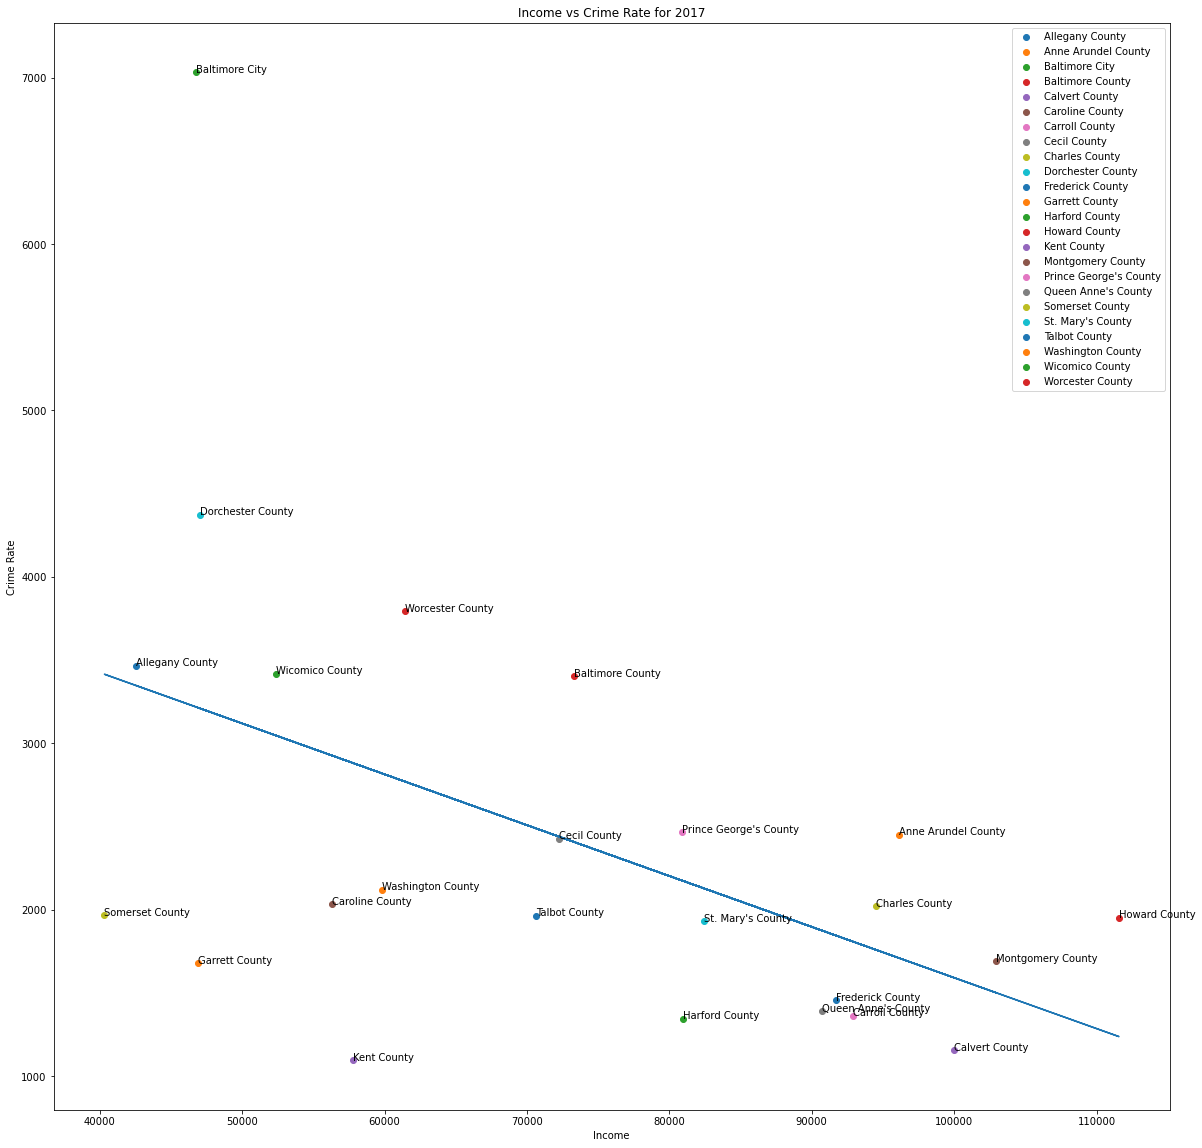

In [ ]:
# Get graph of crime rate vs income per year
by_year = crime_df.groupby(crime_df['YEAR'])

index = 0   # must keep track of overall index in dataframe
for year in years: 
    group = by_year.get_group(year)
    plt.figure(figsize=(20, 20))
    
    # create scatter plot for year 
    for i in range(index, index+len(group)):
        if (group['align income'][i]):
            plt.scatter(group['INCOME'][i], group['OVERALL CRIME RATE PER 100,000 PEOPLE'][i])
            plt.annotate(group['JURISDICTION'][i], (group['INCOME'][i], group['OVERALL CRIME RATE PER 100,000 PEOPLE'][i]))
    index = index + len(group)
    plt.xlabel('Income')
    plt.ylabel('Crime Rate')
    plt.legend(group['JURISDICTION'])
    plt.title("Income vs Crime Rate for " + str(year))
    
    # add linear regression 
    z = np.polyfit(group['INCOME'], group['OVERALL CRIME RATE PER 100,000 PEOPLE'], 1)
    linReg = np.poly1d(z)
    plt.plot(group['INCOME'], linReg(group['INCOME']), '-')
    plt.show()

Above are graphs depicting the relationship between the County's median income and its crime rate separated by year. Over the past years 2017, 2018, and 2019, one can see an overall trend. As the median household income increases, the crime rate in that county decreases. In order to further analyze this data, we will test the model via the Pearson Correlation method. This analytical method measures the linear dependance between the two variables. 

In [ ]:
# Get graph of crime rate vs income per year
by_year = crime_df.groupby(crime_df['YEAR'])

# for each year, analyze the relationship trend
for year in years: 
    group = by_year.get_group(year)
    
    # render statistical analysis of regression
    x = group['INCOME'].values.reshape(-1,1)
    y = group['OVERALL CRIME RATE PER 100,000 PEOPLE'].values.reshape(-1,1)
    reg = LinearRegression()
    reg.fit(x, y)
    print("\n\nThe linear model for Crime rate vs Income in " + str(year) + " is:") 
    print("Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

Here we used the python's statsmodel library to run the correlation analysis. Above is the summary for each graph. From the summaries, we are speicifically looking at the r-sqaured value, the t value, and the p value. The r-squared value represents the proportion of the variance for a dependent variable thats explained by an independent variable. 

# Crime Rate vs Local Spending 
EXPLANATION 

In [ ]:
# combine crime and education spending dataframes 

# since funding df only has 2018 and 2019 data, remove 2017 from crime
crime_18_19 = crime_df.loc[crime_df['YEAR'] != 2017]
crime_18_19 = crime_18_19.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

crime_18_19['FUNDING'] = funding_df['Local Funding Per Pupil']
# make sure rows align
crime_18_19['align funding'] = funding_df['County']==crime_18_19['JURISDICTION']

crime_18_19.head()

In [ ]:
# Get graph of crime rate vs funding per year
by_year = crime_18_19.groupby(crime_18_19['YEAR'])

index = 0   # must keep track of overall index in dataframe
for year in [2018, 2019]: 
    group = by_year.get_group(year)
    plt.figure(figsize=(20, 20))
    for i in range(index, index+len(group)):
        if (group['align funding'][i]):
            plt.scatter(group['FUNDING'][i], group['OVERALL CRIME RATE PER 100,000 PEOPLE'][i])
            plt.annotate(group['JURISDICTION'][i], (group['FUNDING'][i], group['OVERALL CRIME RATE PER 100,000 PEOPLE'][i]))
    index = index + len(group)
    plt.xlabel('Local Funding')
    plt.ylabel('Crime Rate')
    plt.legend(group['JURISDICTION'])
    plt.title("Spending vs Crime Rate for " + str(year))
    
    # add linear regression 
    z = np.polyfit(group['FUNDING'], group['OVERALL CRIME RATE PER 100,000 PEOPLE'], 1)
    linReg = np.poly1d(z)
    plt.plot(group['FUNDING'], linReg(group['FUNDING']), '-')
    plt.show()
    
    # render statistical analysis of regression
    x = group['FUNDING'].values.reshape(-1,1)
    y = group['OVERALL CRIME RATE PER 100,000 PEOPLE'].values.reshape(-1,1)
    reg = LinearRegression()
    reg.fit(x, y)
    print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

Above are graphs depicting the relationship between the County's local funding and its crime rate separated by year. Over the past years 2018 and 2019, one can see an overall trend. As the local spending per pupil increases, the crime rate in that county decreases.

# Crime Rate vs Unemployment  
EXPLANATION 

In [ ]:
# Combine crime and income dataframes 
crime_df['UNEMPLOYMENT'] = unemploy_df['UnemploymentRate']
# make sure rows align
crime_df['align employ'] = unemploy_df['County']==crime_df['JURISDICTION']

crime_df.head()

In [ ]:
by_year = crime_df.groupby(crime_df['YEAR'])

index = 0   # must keep track of overall index in dataframe
for year in years: 
    group = by_year.get_group(year)
    plt.figure(figsize=(20, 20))
    for i in range(index, index+len(group)):
        if (group['align employ'][i]):
            plt.scatter(group['UNEMPLOYMENT'][i], group['OVERALL CRIME RATE PER 100,000 PEOPLE'][i])
            plt.annotate(group['JURISDICTION'][i], (group['UNEMPLOYMENT'][i], group['OVERALL CRIME RATE PER 100,000 PEOPLE'][i]))
    index = index + len(group)
    plt.xlabel('Unemployment Rate')
    plt.ylabel('Crime Rate')
    plt.legend(group['JURISDICTION'])
    plt.title("Unemployment vs Crime Rate for " + str(year))
    
    # add linear regression 
    z = np.polyfit(group['UNEMPLOYMENT'], group['OVERALL CRIME RATE PER 100,000 PEOPLE'], 1)
    linReg = np.poly1d(z)
    plt.plot(group['UNEMPLOYMENT'], linReg(group['UNEMPLOYMENT']), '-')
    plt.show()
    
    # render statistical analysis of regression
    x = group['UNEMPLOYMENT'].values.reshape(-1,1)
    y = group['OVERALL CRIME RATE PER 100,000 PEOPLE'].values.reshape(-1,1)
    reg = LinearRegression()
    reg.fit(x, y)
    print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
    X2 = sm.add_constant(x)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

Above are graphs depicting the relationship between the County's unemployment and its crime rate separated by year. Over the past years 2017, 2018, and 2019, one can see an overall trend. As the unemployment rate increases, the crime rate in that county increases.

# Create Model for 2018
EXPLANATION

In [ ]:
# get dataframes for only 2018 
crime_18 = crime_df.loc[crime_df['YEAR'] == 2018]
fund_18 = crime_18_19.loc[crime_18_19['YEAR'] == 2018]

table_18 = pd.merge(crime_18, fund_18[['JURISDICTION','FUNDING']], on='JURISDICTION', how="left")
table_18.head()

In [ ]:
# create variables for model 
X = table_18[['INCOME',
              'UNEMPLOYMENT', 
              'FUNDING']]
X = pd.get_dummies(data=X, drop_first=True)
Y = table_18['OVERALL CRIME RATE PER 100,000 PEOPLE']

In [ ]:
# learn more about this go to 
# https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c

# split data in to test and train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

model = LinearRegression()
model.fit(X_train,y_train)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

EXPLANATION of coefficients and how they correlate to target 

this is what the website says: "The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.
A positive sign indicates that as the predictor variable increases, the Target variable also increases.
A negative sign indicates that as the predictor variable increases, the Target variable decreases."

In [ ]:
# plot model and predictions 
predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)
plt.title('Linear Regression of Crime Rate based on Income, Funding, and Unemployment for 2018')

"Seaborn calculates and plots a linear regression model fit, along with a translucent 95% confidence interval band."

In [ ]:
# render statistical siginicance of linear model
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

In [ ]:
# Create Model for 2019 

In [ ]:
# get dataframes for only 2018 
crime_19 = crime_df.loc[crime_df['YEAR'] == 2019]
fund_19 = crime_18_19.loc[crime_18_19['YEAR'] == 2019]

table_19 = pd.merge(crime_19, fund_19[['JURISDICTION','FUNDING']], on='JURISDICTION', how="left")

# create variables for model 
X = table_19[['INCOME',
              'UNEMPLOYMENT', 
              'FUNDING']]
X = pd.get_dummies(data=X, drop_first=True)
Y = table_19['OVERALL CRIME RATE PER 100,000 PEOPLE']

# split data in to test and train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

# train model
model = LinearRegression()
model.fit(X_train,y_train)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
print(coeff_parameter)

In [ ]:
# plot model and predictions 
predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)
plt.title('Linear Regression of Crime Rate based on Income, Funding, and Unemployment for 2019')

In [ ]:
# render statistical siginicance of linear model
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())